# Visualization of Convolutional Neural Networks

## 가중치 시각화

- 여러 개의 필터를 사용해 이미지에서 특징을 학습
- 각 filter는 kernal이라 부르는 weight와 bias를 가지고 있음
- weight는 input image의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할
- filter의 가운데 곡선 부분의 weight는 높고, 그 외 부분의 weight 값은 낮음

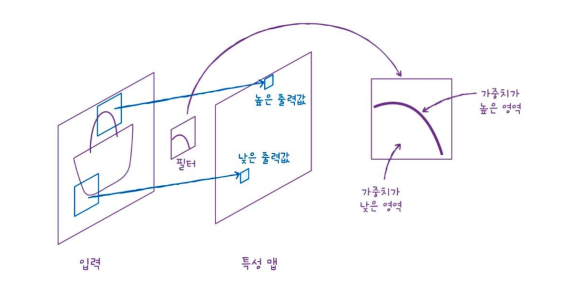

In [2]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2022-02-05 09:30:06--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2022-02-05 09:30:06--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4049416 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5’

best-cnn-model.h5   100%[===================>]   3.86M  --.-KB/s    in 0.1s    

2022-02-05 09:30:07 (38.9 MB/s) - ‘best-cnn-model.h5’ saved [4049416/4049416]



In [3]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [4]:
model = keras.models.load_model('best-cnn-model.h5')

In [5]:
model.layers

- Conv2D, MaxPooling2D Layer가 번갈아가며 2번 연속 등장
- Flatten, Dense, Dropout layer가 차례대로 등장
- 마지막에 Dense Layer가 있음

In [6]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


- layer의 weight과 bias는 weights 속성에 저장되어 있음

In [7]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.0065098377 0.22782646


- weight의 평균값은 0에 가깝고, 표준편차는 0.27
- 나중에 이 값을 훈련하기 전의 가중치와 비교하기 위한 히스토그램

In [8]:
import matplotlib.pyplot as plt

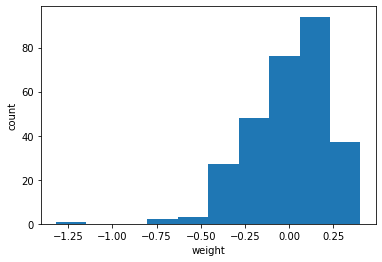

In [9]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

- matplotlib의 hist() 함수에는 히스토그램을 그리기 위해 1차원 배열로 전달해야 함
- numpy의 reshape 메서드로 conv_weights 배열을 1개의 열이 있는 배열로 변환함

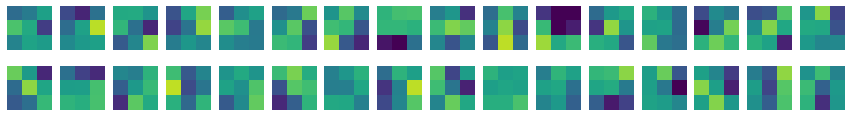

In [10]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

- `imshow()` 함수는 배열에 있는 최댓값과 최솟값을 사용해 픽셀의 강도를 표현함
- `vmin`과 `vmax`로 matplotlib의 colormap으로 표현할 범위를 지정

In [11]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                          'relu', padding='same', input_shape=(28,28,1)))

In [12]:
# 모델의 첫 번째 층(즉 Conv2D layer)의 가중치를 no_training_conv 변수에 저장
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


- (3,3) 커널을 가진 필터를 32개 사용

In [13]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.00074704975 0.08567352


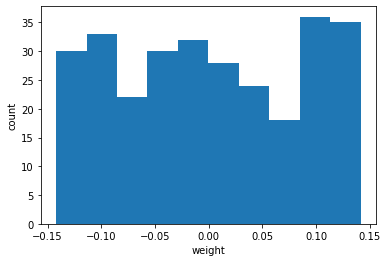

In [14]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

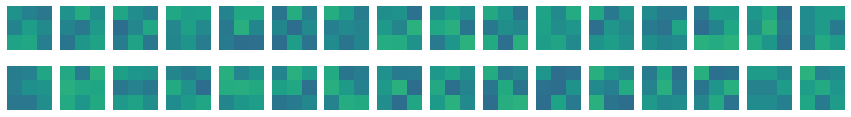

In [15]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5,
                    vmax=0.5)
    axs[i, j].axis('off')
plt.show()

- 가중치가 밋밋하게 초기화 됨

## 함수형 API

- 함수형 API는 케라스의 Model 클래스를 사용하여 만듦

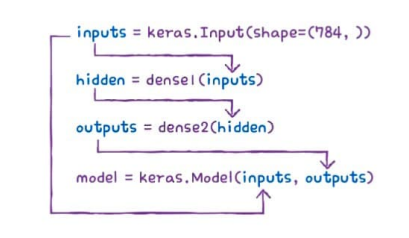

- 입력에서 출력까지 연결하고, 마지막에 Model 클래스에 입력과 출력을 지정하여 모델을 만듦
- 이렇게 만들면 중간에 다양한 형태로 층을 연결할 수 있음


In [16]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [17]:
conv_acti = keras.Model(model.input, model.layers[0].output)

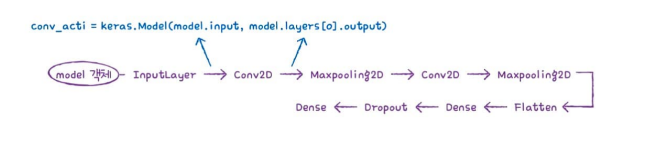

`model.input`과 `model.layers[0].output`을 연결하는 새로운 `conv_acti` 모델을 만들 수 있음

## 특성 맵 시각화

In [18]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


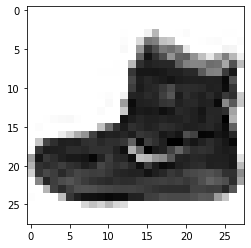

In [19]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [20]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

In [21]:
print(feature_maps.shape)

(1, 28, 28, 32)


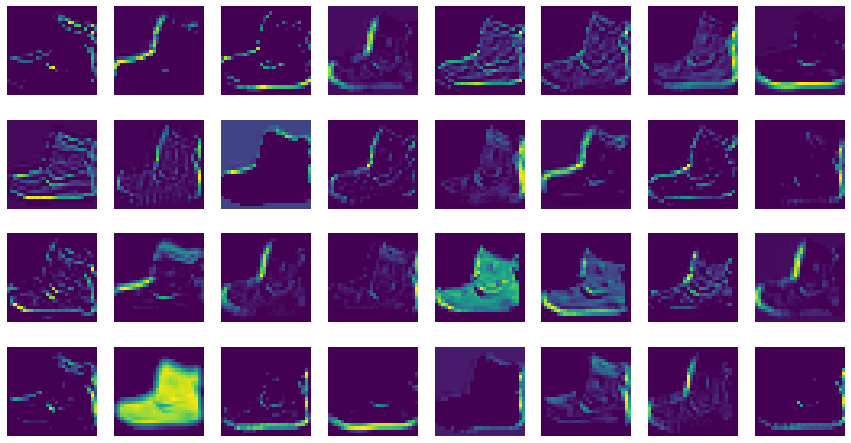

In [22]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [23]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [24]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

In [25]:
print(feature_maps.shape)

(1, 14, 14, 64)


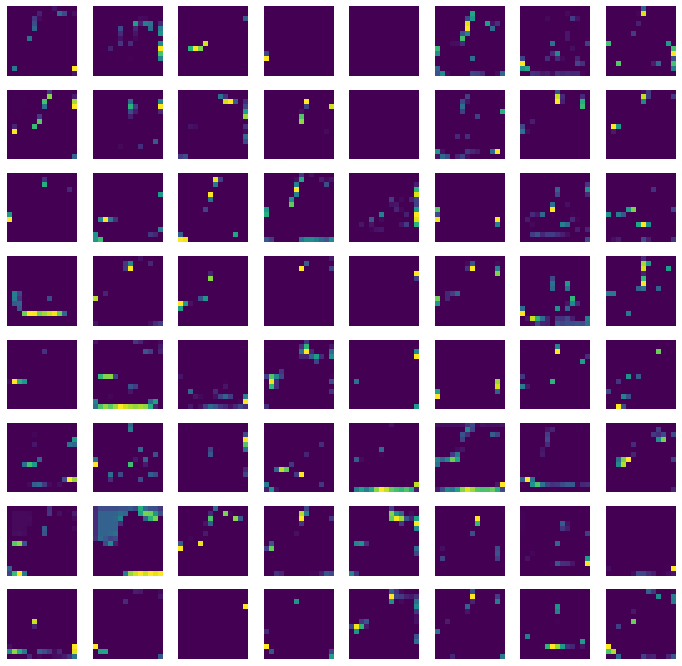

In [26]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

- 위 feature map은 시각적으로 이해하기 어려움
- 두 번째 conv의 filter size는 (3,3,32)임
- 두 번째 conv filter가 앞에서 출력된 32개의 feature map과 곱해져 첫 번째 feature map이 됨

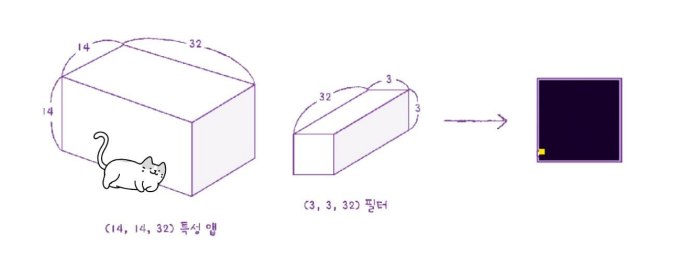

- 이렇게 계산된 출력은 (14,14,32) feature map에서 어떤 부위를 감지하는지 직관적으로 이해하기 어려움

## Summary

- 가중치 시각화: 합성곱의 가중치를 이미지로 출력하는 것. 가중치가 시각적인 패턴을 학습하는지 볼 수 있음
- 특성 맵 시각화: 합성곱 층의 활성화 출력을 이미지로 그리는 것을 말함. 가중치 시각화와 함께 비교하여 각 필터가 이미지의 어느 부분을 활성화 시키는지 확인 할 수 있음
- 함수형 API: keras에서 신경망 모델을 만드는 방법 중 하나. Model 클래스에 모델의 입력과 출력을 지정. 입력은 Input() 함수를 사용하여 정의하고 출력은 마지막 층의 출력으로 정의